Gaussian White noise is a random signal having equal intensity at different frequencies.
It can have Uniform, Normal or other kind of distributions. We choose normal here using np.random.normal function.
parameter D is related to diffusion of particles in the fluid. D is the diffusion constant which can be set to 1.

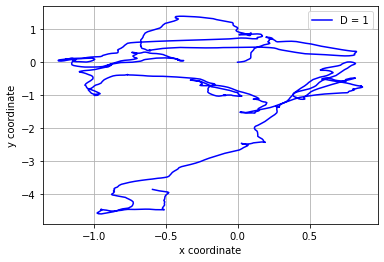

In [56]:
'''
__author__= "hemkum"
'''

import numpy as np
import matplotlib.pyplot as plt
import math

D = 1 #diffusion constant

# generic function to solve one set of equations.  We use function overloading
#to solve for  x an y separately using same function
def calc(): 
    #define some constants and variables
    mu = 0
    global D
    sigma  = 1
    s = np.random.normal(mu, sigma, size=10000) #gaussian white noise

    h = 0.1 #step size
    #initial conditions
    x=[0]
    t=[0]
    Vx = [np.random.rand()] #using random value as initial Vx

    #defining functions
    def f1x(t,x,Vx): #defining dy/dt
        return Vx

    def f2x(t,x,Vx): #defining dVx/dt
        return -Vx + s[int(t*10)]

    #calculations for RK4 method
    for i in range(0, 1000):
        k1 = h*f1x(t[i], x[i], Vx[i])
        l1 = h*f2x(t[i], x[i], Vx[i])

        k2 = h*f1x(t[i] + h/2, x[i] + k1/2, Vx[i] + l1/2)
        l2 = h*f2x(t[i] + h/2, x[i] + k1/2, Vx[i] + l1/2)

        k3 = h*f1x(t[i] + h/2, x[i] + k2/2, Vx[i] + l2/2)
        l3 = h*f2x(t[i] + h/2, x[i] + k2/2, Vx[i] + l2/2)

        k4 = h*f1x(t[i] + h, x[i] + k3, Vx[i] + l3)
        l4 = h*f2x(t[i] + h, x[i] + k3, Vx[i] + l3)

        #updating t,x,Vx
        t.insert(i+1, t[i]+h)
        x.insert(i+1, x[i] + 1/6 * (k1 + 2*k2 + 2*k3 + k4))
        Vx.insert(i+1, Vx[i] + 1/6 * (l1 + 2*l2 + 2*l3 + l4))
    
    return x #return x position

#calling calc to find x and y coorinates
x = calc()
y = calc() #using the same function to solve for y as well

#graphing
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.plot(x,y, "-b", label="D = {}".format(D))
plt.grid()  
plt.legend()
plt.savefig('D',dpi=500)
plt.show()
plt.close()
